### 14.1训练与测试样本

#### 1.留出法

In [ ]:
#第一步，划分数据集
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=6)

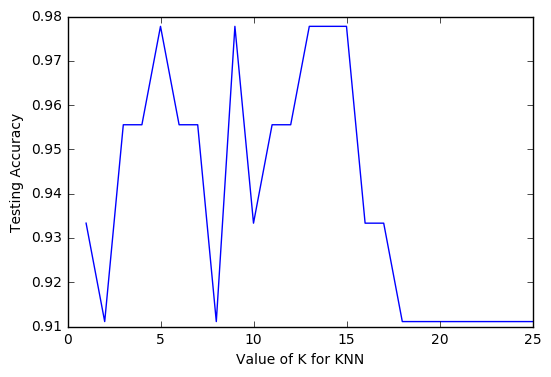

In [39]:
#第二步，为KNN模型找到最优的K值
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
%matplotlib inline
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [41]:
#第三步，比较逻辑回归、决策树和随机森林的准确率
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.977777777778


In [42]:
#基于留出法训练决策树模型
from sklearn import tree
dtree=tree.DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)
y_pred=dtree.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.955555555556


In [44]:
#基于留出法训练随机森林模型
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators =100,criterion='entropy',random_state=1)  
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.933333333333


#### 2 交叉验证法

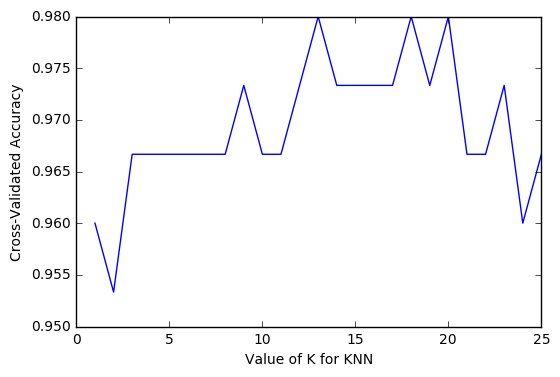

In [47]:
#第一步 基于交叉验证法训练KNN模型，找出分类准确率最高的Ｋ值
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
k_range = list(range(1, 26))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, iris.data, iris.target, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
%matplotlib inline
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [48]:
#第二步 基于交叉验证法，比较逻辑回归、决策树、随机森林的分类准确率
logreg = LogisticRegression()
scores = cross_val_score(logreg, iris.data, iris.target, cv=10, scoring='accuracy')
print(scores.mean())
dtree=tree.DecisionTreeClassifier(criterion='entropy')
scores = cross_val_score(dtree, iris.data, iris.target, cv=10, scoring='accuracy')
print(scores.mean())
rf = RandomForestClassifier(n_estimators =100,criterion='entropy',random_state=1)  
scores = cross_val_score(rf, iris.data, iris.target, cv=10, scoring='accuracy')
print(scores.mean())

0.953333333333
0.953333333333
0.966666666667


### 14.2性能评价指标

In [3]:
#导入本地csv数据集
import pandas as pd
file="pima-indians-diabetes.csv"
diabetes = pd.read_csv(file, header=0)
feature_cols = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree', 'age']
X = diabetes[feature_cols]
y = diabetes.label
diabetes.head()   #显示皮马数据集前5条记录

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### 1.混淆矩阵

In [55]:
#基于留出法划分数据集，训练逻辑回归模型
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=0,test_size=0.3)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
#计算准确率
y_pred= logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.78354978355


In [57]:
#显示预测结果的混淆矩阵
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))

[[142  15]
 [ 35  39]]


#### 2.查准率 查全率 F1指标

In [58]:
#计算皮马数据集上逻辑回归模型的P、R、F1指标
confusion=metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
P=TP/float(TP+FP)
R=TP/float(TP+FN)
F1=2*P*R/(P+R)
print(P,R,F1)

0.722222222222 0.527027027027 0.609375


In [60]:
#通过classification_report计算P、R、F1
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.80      0.90      0.85       157
          1       0.72      0.53      0.61        74

avg / total       0.78      0.78      0.77       231



### 14.3分类阈值的调整

#### 1.ROC曲线

In [61]:
#查看皮马数据集逻辑回归模型，前5条测试数据的分类预测概率
logreg.predict_proba(X_test)[0:5, :]  

array([[ 0.1096152 ,  0.8903848 ],
       [ 0.78967345,  0.21032655],
       [ 0.85920276,  0.14079724],
       [ 0.39141783,  0.60858217],
       [ 0.82568236,  0.17431764]])

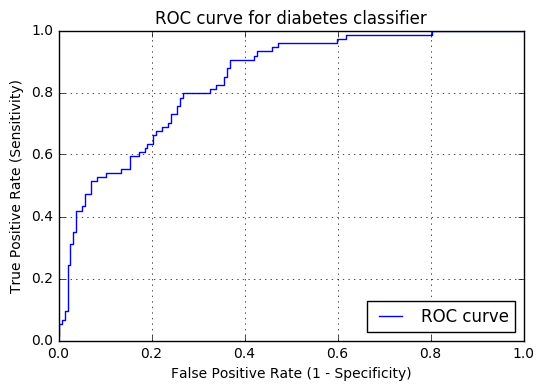

In [62]:
#绘制ROC曲线
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
pred_prob=logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob)
plt.plot(fpr, tpr,label='ROC curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)


In [63]:
#查看分类阈值为0.5时的TPR和FPR
print(tpr[thresholds>0.5][-1])
print(fpr[thresholds > 0.5][-1])

0.527027027027
0.0828025477707


#### 2.计算不同模型的AUC值

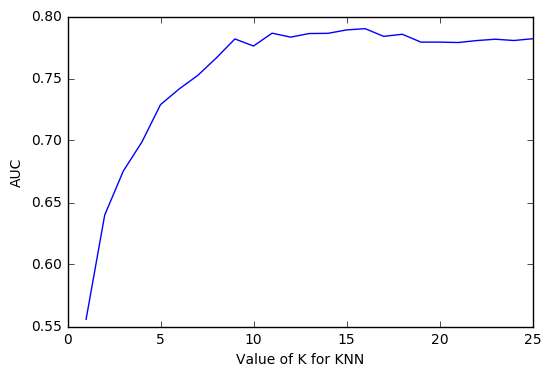

In [65]:
#找出KNN模型AUC最高的K值
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_prob=knn.predict_proba(X_test)[:,1]
    scores.append(metrics.roc_auc_score(y_test, pred_prob))
import matplotlib.pyplot as plt
# allow plots to appear within the notebook
%matplotlib inline
# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('AUC')

In [68]:
#计算KNN(15)、逻辑回归、决策树、随机森林模型的AUC值
#KNN(15)模型
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
pred_prob_knn=knn.predict_proba(X_test)[:,1]
#逻辑回归模型
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred_prob_logreg=logreg.predict_proba(X_test)[:,1]
#决策树模型
dtree=tree.DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)
pred_prob_dtree=dtree.predict_proba(X_test)[:,1]
#随机森林模型
rf = RandomForestClassifier(n_estimators =100,criterion='entropy',random_state=1)  
rf.fit(X_train, y_train)
pred_prob_rf=rf.predict_proba(X_test)[:,1]
print(metrics.roc_auc_score(y_test, pred_prob_knn))
print(metrics.roc_auc_score(y_test, pred_prob_logreg))
print(metrics.roc_auc_score(y_test, pred_prob_dtree))
print(metrics.roc_auc_score(y_test, pred_prob_rf))

0.789163367189
0.839042864521
0.689404372525
0.83202788776
